In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('supermarket_sales.csv')

In [47]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [48]:
df1 = df.loc[:,['Quantity','cogs']]
df1.head()

,Quantity,cogs
0,7,522.83
1,5,76.40
2,7,324.31
3,8,465.76
4,7,604.17


In [49]:
df1.describe()

,Quantity,cogs
count,1000.000000,1000.00000
mean,5.510000,307.58738
std,2.923431,234.17651
min,1.000000,10.17000
25%,3.000000,118.49750
50%,5.000000,241.76000
75%,8.000000,448.90500
max,10.000000,993.00000


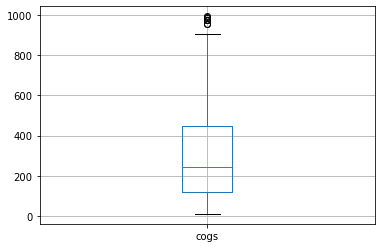

In [50]:
df1.boxplot(['cogs'])
plt.show()

In [51]:
import numpy as np

In [52]:
q1 = np.quantile(df1['cogs'],0.25)
q3 = np.quantile(df1['cogs'],0.75)
iqr = q3-q1
uw = (q3+(1.5*iqr))

why we calculate Upper Whisker (UW) ?
we need to know the highest value where there is no outlier is present after this value all values are outliers


In [53]:
uw

944.5162500000001

In [54]:
 a =[]
for i in df1['cogs']:
        if i > uw:
            a.append(i)

In [55]:
a

[955.8, 989.8, 993.0, 954.4, 972.1, 985.2, 975.0, 973.7, 973.8]

In [56]:
len(a)

9

In [57]:
total = len(df1['cogs'])

In [58]:
percentoutlier = round(len(a)/total*100,3)
percentoutlier

0.9

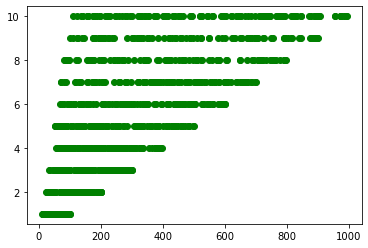

In [59]:
plt.scatter(df['cogs'],df['Quantity'],color = 'g')

if the quantity increases cogs increases

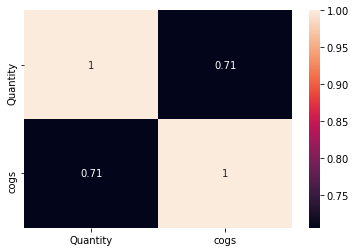

In [60]:
sns.heatmap(df1.corr(), annot =True)
plt.show()

In [61]:
df1.isnull().sum()

Quantity    0
cogs        0
dtype: int64

In [62]:
x = df1.iloc[:,[0]]
y = df1.iloc[:,[1]]

In [63]:
print('x variable is\n',x.head(2))
print('\ny variable is\n',y.head(2))

x variable is
    Quantity
0         7
1         5

y variable is
      cogs
0  522.83
1   76.40


In [64]:
from sklearn import linear_model
dir(linear_model)

['ARDRegression',
 'BayesianRidge',
 'ElasticNet',
 'ElasticNetCV',
 'GammaRegressor',
 'Hinge',
 'Huber',
 'HuberRegressor',
 'Lars',
 'LarsCV',
 'Lasso',
 'LassoCV',
 'LassoLars',
 'LassoLarsCV',
 'LassoLarsIC',
 'LinearRegression',
 'Log',
 'LogisticRegression',
 'LogisticRegressionCV',
 'ModifiedHuber',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'OrthogonalMatchingPursuit',
 'OrthogonalMatchingPursuitCV',
 'PassiveAggressiveClassifier',
 'PassiveAggressiveRegressor',
 'Perceptron',
 'PoissonRegressor',
 'RANSACRegressor',
 'Ridge',
 'RidgeCV',
 'RidgeClassifier',
 'RidgeClassifierCV',
 'SGDClassifier',
 'SGDRegressor',
 'SquaredLoss',
 'TheilSenRegressor',
 'TweedieRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_bayes',
 '_cd_fast',
 '_coordinate_descent',
 '_glm',
 '_huber',
 '_least_angle',
 '_logistic',
 '_omp',
 '_pa

In [66]:
from sklearn import linear_model as lm
lr = linear_model.LinearRegression()

In [69]:
model = lr.fit(x,y)
model

LinearRegression()

In [70]:
model.coef_

array([[56.51371136]])

In [71]:
model.intercept_

array([-3.80316958])

In [72]:
print('Final formula of linear Regression is Y ={}*x+{}'.format(model.coef_,model.intercept_))

Final formula of linear Regression is Y =[[56.51371136]]*x+[-3.80316958]


predict the Data First

In [74]:
y_pred = model.predict(x)
y_pred[:5]

array([[391.79280992],
       [278.76538721],
       [391.79280992],
       [448.30652128],
       [391.79280992]])

In [77]:
type(y_pred)

numpy.ndarray

sklearn matrix

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [86]:
mse  = mean_squared_error(y,y_pred)
mae = mean_absolute_error(y,y_pred)
rmse = np.sqrt(mse)
mape = mae/100
r2 = r2_score(y,y_pred)

In [87]:
print('Error Metrics\n\n')
print('Mean Squared error is',mse,'\n')
print('Root Mean Squared error is',rmse,'\n')
print('Mean absolute error is',mae,'\n')
print('Mean absolute percent error is',mape,'\n')
print('R Squared error is',r2,'\n')


Error Metrics


Mean Squared error is 27515.45765939907 

Root Mean Squared error is 165.8778395669508 

Mean absolute error is 127.12300521280409 

Mean absolute percent error is 1.2712300521280409 

R Squared error is 0.4977446224697587 

